In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [127]:
train = pd.read_csv(r"/content/drive/MyDrive/LG Aimers/data/train.csv")
test = pd.read_csv(r"/content/drive/MyDrive/LG Aimers/data/test.csv")

In [128]:
train.head()

,Wip Line_Dam,Process Desc._Dam,Equipment_Dam,Model.Suffix_Dam,Workorder_Dam,Insp. Seq No._Dam,Insp Judge Code_Dam,CURE END POSITION X Collect Result_Dam,CURE END POSITION X Unit Time_Dam,CURE END POSITION X Judge Value_Dam,...,Production Qty Collect Result_Fill2,Production Qty Unit Time_Fill2,Production Qty Judge Value_Fill2,Receip No Collect Result_Fill2,Receip No Unit Time_Fill2,Receip No Judge Value_Fill2,WorkMode Collect Result_Fill2,WorkMode Unit Time_Fill2,WorkMode Judge Value_Fill2,target
0,IVI-OB6,Dam Dispenser,Dam dispenser #1,AJX75334505,4F1XA938-1,1,OK,240.0,NaN,NaN,...,7,NaN,NaN,127,NaN,NaN,1,NaN,NaN,Normal
1,IVI-OB6,Dam Dispenser,Dam dispenser #1,AJX75334505,3KPM0016-2,1,OK,240.0,NaN,NaN,...,185,NaN,NaN,1,NaN,NaN,0,NaN,NaN,Normal
2,IVI-OB6,Dam Dispenser,Dam dispenser #2,AJX75334501,4E1X9167-1,1,OK,1000.0,NaN,NaN,...,10,NaN,NaN,73,NaN,NaN,1,NaN,NaN,Normal
3,IVI-OB6,Dam Dispenser,Dam dispenser #2,AJX75334501,3K1X0057-1,1,OK,1000.0,NaN,NaN,...,268,NaN,NaN,1,NaN,NaN,0,NaN,NaN,Normal
4,IVI-OB6,Dam Dispenser,Dam dispenser #1,AJX75334501,3HPM0007-1,1,OK,240.0,NaN,NaN,...,121,NaN,NaN,1,NaN,NaN,0,NaN,NaN,Normal


In [129]:
col_to_drop = train.columns[train.isna().all()]
# 모든 데이터가 결측된 열은 제거
train = train.dropna(axis=1, how = 'all')
test = test.dropna(axis=1, how = 'all')

In [130]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 40506 entries, 0 to 40505
Columns: 186 entries, Wip Line_Dam to target
dtypes: float64(72), int64(77), object(37)
memory usage: 57.5+ MB


In [131]:
test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17361 entries, 0 to 17360
Columns: 186 entries, Set ID to WorkMode Collect Result_Fill2
dtypes: float64(72), int64(77), object(37)
memory usage: 24.6+ MB


## 데이터프레임 분할

In [132]:
y_train = train.copy()[[train.columns[-1]]]
train1 = train.copy()[train.columns[:47]]
train2 = train.copy()[train.columns[47:93]]
train3 = train.copy()[train.columns[93:139]]
train4 = train.copy()[train.columns[139:]]

test = test.drop(test.columns[0],axis=1)
test1 = test.copy()[test.columns[:47]]
test2 = test.copy()[test.columns[47:93]]
test3 = test.copy()[test.columns[93:139]]
test4 = test.copy()[test.columns[139:]]

In [133]:
train1 = pd.concat([train1,y_train],axis=1)
train2 = pd.concat([train2,y_train],axis=1)
train3 = pd.concat([train3,y_train],axis=1)
train4 = pd.concat([train4,y_train],axis=1)

In [134]:
display(train1.head())
train1.info()
df = train1.copy()

,Wip Line_Dam,Process Desc._Dam,Equipment_Dam,Model.Suffix_Dam,Workorder_Dam,Insp. Seq No._Dam,Insp Judge Code_Dam,CURE END POSITION X Collect Result_Dam,CURE END POSITION Z Collect Result_Dam,CURE END POSITION Θ Collect Result_Dam,...,Head Clean Position Y Collect Result_Dam,Head Clean Position Z Collect Result_Dam,Head Purge Position X Collect Result_Dam,Head Purge Position Y Collect Result_Dam,Head Purge Position Z Collect Result_Dam,Head Zero Position X Collect Result_Dam,Head Zero Position Y Collect Result_Dam,Head Zero Position Z Collect Result_Dam,Machine Tact time Collect Result_Dam,target
0,IVI-OB6,Dam Dispenser,Dam dispenser #1,AJX75334505,4F1XA938-1,1,OK,240.0,2.5,-90,...,127.5,66.00,124.0,257,66.00,130.85,505.0,300.0,265.00,Normal
1,IVI-OB6,Dam Dispenser,Dam dispenser #1,AJX75334505,3KPM0016-2,1,OK,240.0,2.5,-90,...,66.0,130.85,257.0,66,130.85,505.00,300.0,265.0,65.10,Normal
2,IVI-OB6,Dam Dispenser,Dam dispenser #2,AJX75334501,4E1X9167-1,1,OK,1000.0,12.5,90,...,127.5,66.00,124.0,257,66.00,130.85,505.0,300.0,265.02,Normal
3,IVI-OB6,Dam Dispenser,Dam dispenser #2,AJX75334501,3K1X0057-1,1,OK,1000.0,12.5,90,...,66.0,130.85,257.0,66,130.85,505.00,300.0,265.0,70.50,Normal
4,IVI-OB6,Dam Dispenser,Dam dispenser #1,AJX75334501,3HPM0007-1,1,OK,240.0,2.5,-90,...,66.0,133.50,257.0,66,133.50,505.00,300.0,265.0,88.30,Normal


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 40506 entries, 0 to 40505
Data columns (total 48 columns):
 #   Column                                                    Non-Null Count  Dtype  
---  ------                                                    --------------  -----  
 0   Wip Line_Dam                                              40506 non-null  object 
 1   Process Desc._Dam                                         40506 non-null  object 
 2   Equipment_Dam                                             40506 non-null  object 
 3   Model.Suffix_Dam                                          40506 non-null  object 
 4   Workorder_Dam                                             40506 non-null  object 
 5   Insp. Seq No._Dam                                         40506 non-null  int64  
 6   Insp Judge Code_Dam                                       40506 non-null  object 
 7   CURE END POSITION X Collect Result_Dam                    40506 non-null  float64
 8   CURE END POSITIO

# 시작 columns 개수

In [135]:
print(df.shape[1])

48


In [136]:
import pandas as pd

# 모든 컬럼에 대해 고유값의 수를 계산
unique_counts = df.nunique()

# 고유값이 하나인 컬럼 필터링
columns_to_drop = unique_counts[unique_counts == 1].index

# 해당 컬럼 제거
df = df.drop(columns=columns_to_drop)

# 결과 확인
print(columns_to_drop)
print(len(columns_to_drop))

Index(['Wip Line_Dam', 'Process Desc._Dam', 'Insp. Seq No._Dam',
       'Insp Judge Code_Dam', 'CURE STANDBY POSITION X Collect Result_Dam',
       'CURE STANDBY POSITION Z Collect Result_Dam',
       'CURE STANDBY POSITION Θ Collect Result_Dam',
       'CURE START POSITION Z Collect Result_Dam',
       'HEAD NORMAL COORDINATE X AXIS(Stage1) Judge Value_Dam'],
      dtype='object')
9


In [137]:
#test에서도 동일하게 제거
test1 = test1.drop(columns=columns_to_drop)

In [138]:
# 지정된 컬럼 리스트
columns_to_check = [
    'Equipment_Dam',
    'Model.Suffix_Dam',
    'Workorder_Dam',
    'HEAD NORMAL COORDINATE X AXIS(Stage1) Collect Result_Dam'
]

# 각 컬럼의 유니크한 값 출력
for col in columns_to_check:
    unique_values = df[col].unique()
    print(f"Column '{col}' unique values:")
    print(unique_values)
    print("\n")

Column 'Equipment_Dam' unique values:
['Dam dispenser #1' 'Dam dispenser #2']


Column 'Model.Suffix_Dam' unique values:
['AJX75334505' 'AJX75334501' 'AJX75334502' 'AJX75334507' 'AJX75334506'
 'AJX75334508' 'AJX75334503']


Column 'Workorder_Dam' unique values:
['4F1XA938-1' '3KPM0016-2' '4E1X9167-1' '3K1X0057-1' '3HPM0007-1'
 '3G1X8297-2' '3M1XH425-1' '4A1XB542-4' '3H1X9883-1' '3G1XD171-2'
 '4E1X9168-1' '4A1XC343-1' '3L1XA128-1' '3L1X8574-2' '3GPM0070-1'
 '3G1X4502-2' '3F1X9648-1' '4B1XA868-1' '3L1XB019-1' '4C1X0049-1'
 '4B1XD472-2' '4B1XD691-1' '3G1XB994-1' '4B1XA871-1' '3MPXX030-0001'
 '3H1XD883-1' '3M1XC472-1' '3H1X9881-1' '3I1XB425-1' '4B1X9674-1'
 '3G1XC498-1' '4A1XB975-2' '3M1XF736-1' '4B1XC717-1' '4C1XG294-1'
 '3G1XC759-1' '3J1XF461-1' '3L1XA998-1' '3K1X0791-1' '3F1XB560-1'
 '3J1XC148-1' '4E1X9997-2' '3I1XB274-1' '3K1XA736-1' '4C1XH941-1'
 '4C1XH315-1' '4A1XC346-1' '3L1X9934-1' '4F1X8043-1' '3H1XE851-1'
 '4F1XB043-1' '3I1XA510-1' '3K1X9801-1' '3L1XB735-2' '3M1XH386-1'
 '3G1XC63

In [139]:
import numpy as np

# 'OK'를 np.nan으로 바꾸기 전의 'OK' 값 개수
before_replace = df['HEAD NORMAL COORDINATE X AXIS(Stage1) Collect Result_Dam'].value_counts().get('OK', 0)

# 'OK'를 np.nan으로 대체
df['HEAD NORMAL COORDINATE X AXIS(Stage1) Collect Result_Dam'] = df['HEAD NORMAL COORDINATE X AXIS(Stage1) Collect Result_Dam'].replace('OK', np.nan)

# 바뀐 개수 출력
print(f"Number of 'OK' values replaced with NaN: {before_replace}")


Number of 'OK' values replaced with NaN: 11293


## 결측치 개수

In [140]:
import pandas as pd

# 전체 행의 수
total_rows = len(df)

# 결측치가 있는 열을 필터링
columns_with_missing = df.columns[df.isnull().any()]

# 각 열의 결측치 개수와 전체 행 수 출력
for column in columns_with_missing:
    missing_count = df[column].isnull().sum()
    missing_percentage = (missing_count / total_rows) * 100
    print(f"Column '{column}':")
    print(f"  Total rows: {total_rows}")
    print(f"  Missing values: {missing_count} ({missing_percentage:.2f}%)\n")


Column 'HEAD NORMAL COORDINATE X AXIS(Stage1) Collect Result_Dam':
  Total rows: 40506
  Missing values: 24059 (59.40%)



In [141]:
# 컬럼 삭제
df = df.drop(columns=['HEAD NORMAL COORDINATE X AXIS(Stage1) Collect Result_Dam'])
test1 = test1.drop(columns=['HEAD NORMAL COORDINATE X AXIS(Stage1) Collect Result_Dam'])

In [142]:
print(df.shape[1])
print(test1.shape[1])

38
37


## 피쳐별 분포 확인

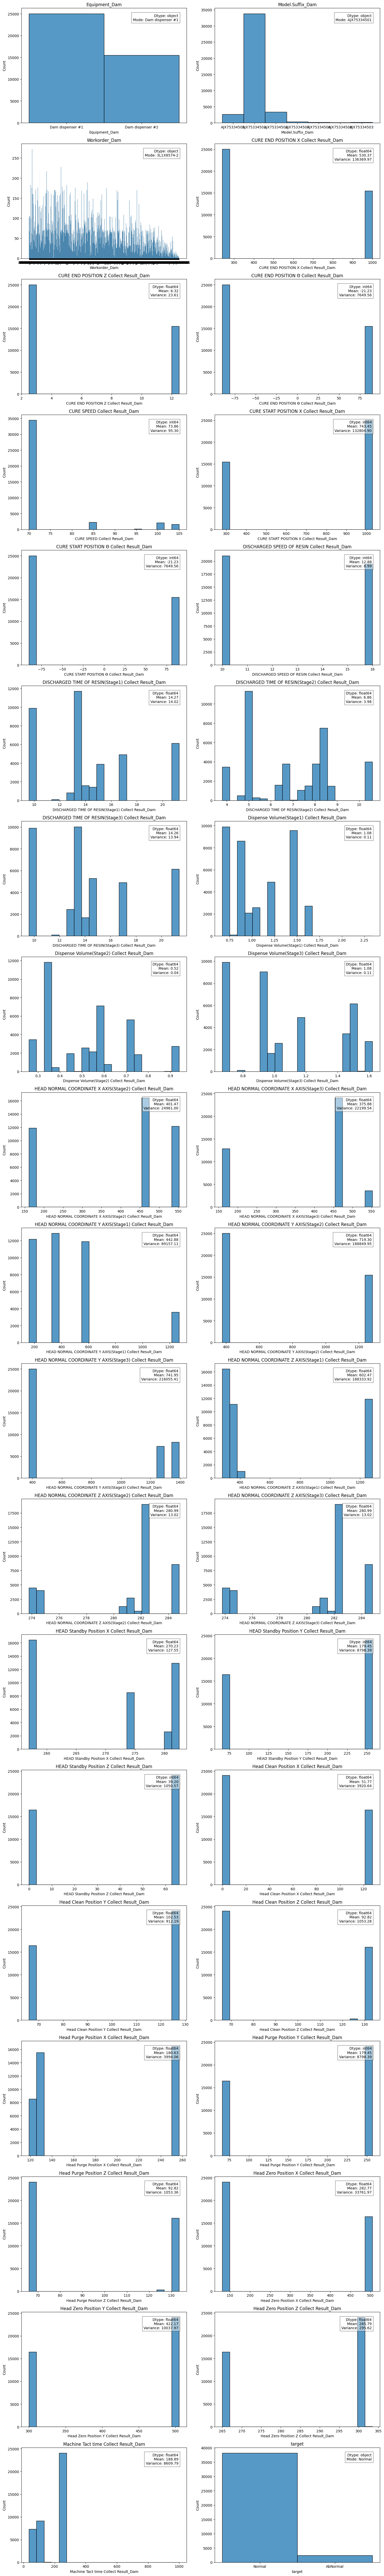

In [143]:
fig, axes = plt.subplots(19, 2, figsize=(15, 100))

for i, col in enumerate(df.columns):
    row = i // 2
    col_idx = i % 2
    sns.histplot(df[col], bins=20, kde=False, ax=axes[row, col_idx])
    axes[row, col_idx].set_title(col)
    dtype = df[col].dtype

    if dtype == 'object':
        most_common = df[col].mode()[0]
        textstr = f'Dtype: {dtype}\nMode: {most_common}'
    else:
        mean_val = df[col].mean()
        var_val = df[col].var()
        textstr = f'Dtype: {dtype}\nMean: {mean_val:.2f}\nVariance: {var_val:.2f}'

    # 통계 값 텍스트로 표시
    axes[row, col_idx].text(0.95, 0.95, textstr, transform=axes[row, col_idx].transAxes,
                            fontsize=10, verticalalignment='top', horizontalalignment='right',
                            bbox=dict(facecolor='white', alpha=0.5))

# 그래프 간 간격 조정
plt.tight_layout()
plt.show()

In [144]:
import pandas as pd

# 유니크한 값이 2개 이하인 컬럼 필터링
columns_with_two_or_fewer_unique_values = [col for col in df.columns if df[col].nunique() <= 2]

# 결과 출력
print("Columns with 2 or fewer unique values:")
for col in columns_with_two_or_fewer_unique_values:
    print(f"{col}: {df[col].nunique()} unique values")

Columns with 2 or fewer unique values:
Equipment_Dam: 2 unique values
CURE END POSITION X Collect Result_Dam: 2 unique values
CURE END POSITION Z Collect Result_Dam: 2 unique values
CURE END POSITION Θ Collect Result_Dam: 2 unique values
CURE START POSITION X Collect Result_Dam: 2 unique values
CURE START POSITION Θ Collect Result_Dam: 2 unique values
HEAD Standby Position Y Collect Result_Dam: 2 unique values
HEAD Standby Position Z Collect Result_Dam: 2 unique values
Head Clean Position X Collect Result_Dam: 2 unique values
Head Clean Position Y Collect Result_Dam: 2 unique values
Head Purge Position Y Collect Result_Dam: 2 unique values
Head Zero Position X Collect Result_Dam: 2 unique values
target: 2 unique values


In [145]:
# 유니크한 값이 2개 이하인 컬럼 리스트
columns_with_two_or_fewer_unique_values = [
    'Equipment_Dam',
    'CURE END POSITION X Collect Result_Dam',
    'CURE END POSITION Z Collect Result_Dam',
    'CURE END POSITION Θ Collect Result_Dam',
    'CURE START POSITION X Collect Result_Dam',
    'CURE START POSITION Θ Collect Result_Dam',
    'HEAD Standby Position Y Collect Result_Dam',
    'HEAD Standby Position Z Collect Result_Dam',
    'Head Clean Position X Collect Result_Dam',
    'Head Clean Position Y Collect Result_Dam',
    'Head Purge Position Y Collect Result_Dam',
    'Head Zero Position X Collect Result_Dam'
]

# 각 컬럼의 데이터 타입 출력
for col in columns_with_two_or_fewer_unique_values:
    dtype = df[col].dtype
    print(f"Column '{col}' has data type: {dtype}")


Column 'Equipment_Dam' has data type: object
Column 'CURE END POSITION X Collect Result_Dam' has data type: float64
Column 'CURE END POSITION Z Collect Result_Dam' has data type: float64
Column 'CURE END POSITION Θ Collect Result_Dam' has data type: int64
Column 'CURE START POSITION X Collect Result_Dam' has data type: int64
Column 'CURE START POSITION Θ Collect Result_Dam' has data type: int64
Column 'HEAD Standby Position Y Collect Result_Dam' has data type: int64
Column 'HEAD Standby Position Z Collect Result_Dam' has data type: int64
Column 'Head Clean Position X Collect Result_Dam' has data type: float64
Column 'Head Clean Position Y Collect Result_Dam' has data type: float64
Column 'Head Purge Position Y Collect Result_Dam' has data type: int64
Column 'Head Zero Position X Collect Result_Dam' has data type: float64


In [146]:
# 유니크한 값이 2개 이하인 컬럼 필터링
test_columns_with_two_or_fewer_unique_values = [col for col in test1.columns if test1[col].nunique() <= 2]

# 결과 출력
print("Columns with 2 or fewer unique values:")
for col in test_columns_with_two_or_fewer_unique_values:
    print(f"{col}: {test1[col].nunique()} unique values")

Columns with 2 or fewer unique values:
Equipment_Dam: 2 unique values
CURE END POSITION X Collect Result_Dam: 2 unique values
CURE END POSITION Z Collect Result_Dam: 2 unique values
CURE END POSITION Θ Collect Result_Dam: 2 unique values
CURE START POSITION X Collect Result_Dam: 2 unique values
CURE START POSITION Θ Collect Result_Dam: 2 unique values
HEAD Standby Position Y Collect Result_Dam: 2 unique values
HEAD Standby Position Z Collect Result_Dam: 2 unique values
Head Clean Position X Collect Result_Dam: 2 unique values
Head Clean Position Y Collect Result_Dam: 2 unique values
Head Purge Position Y Collect Result_Dam: 2 unique values
Head Zero Position X Collect Result_Dam: 2 unique values


In [147]:
df['target'] = df['target'].map({'Normal': 0, 'AbNormal': 1})
df.head()

,Equipment_Dam,Model.Suffix_Dam,Workorder_Dam,CURE END POSITION X Collect Result_Dam,CURE END POSITION Z Collect Result_Dam,CURE END POSITION Θ Collect Result_Dam,CURE SPEED Collect Result_Dam,CURE START POSITION X Collect Result_Dam,CURE START POSITION Θ Collect Result_Dam,DISCHARGED SPEED OF RESIN Collect Result_Dam,...,Head Clean Position Y Collect Result_Dam,Head Clean Position Z Collect Result_Dam,Head Purge Position X Collect Result_Dam,Head Purge Position Y Collect Result_Dam,Head Purge Position Z Collect Result_Dam,Head Zero Position X Collect Result_Dam,Head Zero Position Y Collect Result_Dam,Head Zero Position Z Collect Result_Dam,Machine Tact time Collect Result_Dam,target
0,Dam dispenser #1,AJX75334505,4F1XA938-1,240.0,2.5,-90,100,1030,-90,16,...,127.5,66.00,124.0,257,66.00,130.85,505.0,300.0,265.00,0
1,Dam dispenser #1,AJX75334505,3KPM0016-2,240.0,2.5,-90,70,1030,-90,10,...,66.0,130.85,257.0,66,130.85,505.00,300.0,265.0,65.10,0
2,Dam dispenser #2,AJX75334501,4E1X9167-1,1000.0,12.5,90,85,280,90,16,...,127.5,66.00,124.0,257,66.00,130.85,505.0,300.0,265.02,0
3,Dam dispenser #2,AJX75334501,3K1X0057-1,1000.0,12.5,90,70,280,90,10,...,66.0,130.85,257.0,66,130.85,505.00,300.0,265.0,70.50,0
4,Dam dispenser #1,AJX75334501,3HPM0007-1,240.0,2.5,-90,70,1030,-90,10,...,66.0,133.50,257.0,66,133.50,505.00,300.0,265.0,88.30,0


In [148]:
# 두 리스트가 동일한지 확인
if test_columns_with_two_or_fewer_unique_values == columns_with_two_or_fewer_unique_values:
    print("같음")
else:
    print("다름")

    # 어떤 요소들이 다른지 확인
    only_in_test = set(test_columns_with_two_or_fewer_unique_values) - set(columns_with_two_or_fewer_unique_values)
    only_in_columns = set(columns_with_two_or_fewer_unique_values) - set(test_columns_with_two_or_fewer_unique_values)

    if only_in_test:
        print("Items only in 'test_columns_with_two_or_fewer_unique_values':")
        print(only_in_test)

    if only_in_columns:
        print("Items only in 'columns_with_two_or_fewer_unique_values':")
        print(only_in_columns)

같음


In [149]:
# 제외할 컬럼 리스트 (test_columns_with_two_or_fewer_unique_values에 해당하는 컬럼들)
columns_to_exclude = test_columns_with_two_or_fewer_unique_values

# 나머지 컬럼에서 유니크한 값의 개수 출력
for col in df.columns:
    if col not in columns_to_exclude:
        unique_count = df[col].nunique()
        print(f"Column '{col}' has {unique_count} unique values.\n")


Column 'Model.Suffix_Dam' has 7 unique values.

Column 'Workorder_Dam' has 663 unique values.

Column 'CURE SPEED Collect Result_Dam' has 5 unique values.

Column 'DISCHARGED SPEED OF RESIN Collect Result_Dam' has 3 unique values.

Column 'DISCHARGED TIME OF RESIN(Stage1) Collect Result_Dam' has 19 unique values.

Column 'DISCHARGED TIME OF RESIN(Stage2) Collect Result_Dam' has 29 unique values.

Column 'DISCHARGED TIME OF RESIN(Stage3) Collect Result_Dam' has 20 unique values.

Column 'Dispense Volume(Stage1) Collect Result_Dam' has 23 unique values.

Column 'Dispense Volume(Stage2) Collect Result_Dam' has 33 unique values.

Column 'Dispense Volume(Stage3) Collect Result_Dam' has 22 unique values.

Column 'HEAD NORMAL COORDINATE X AXIS(Stage2) Collect Result_Dam' has 41 unique values.

Column 'HEAD NORMAL COORDINATE X AXIS(Stage3) Collect Result_Dam' has 40 unique values.

Column 'HEAD NORMAL COORDINATE Y AXIS(Stage1) Collect Result_Dam' has 36 unique values.

Column 'HEAD NORMAL COOR

## 범주형 인코딩

In [150]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 40506 entries, 0 to 40505
Data columns (total 38 columns):
 #   Column                                                    Non-Null Count  Dtype  
---  ------                                                    --------------  -----  
 0   Equipment_Dam                                             40506 non-null  object 
 1   Model.Suffix_Dam                                          40506 non-null  object 
 2   Workorder_Dam                                             40506 non-null  object 
 3   CURE END POSITION X Collect Result_Dam                    40506 non-null  float64
 4   CURE END POSITION Z Collect Result_Dam                    40506 non-null  float64
 5   CURE END POSITION Θ Collect Result_Dam                    40506 non-null  int64  
 6   CURE SPEED Collect Result_Dam                             40506 non-null  int64  
 7   CURE START POSITION X Collect Result_Dam                  40506 non-null  int64  
 8   CURE START POSIT

In [151]:
# 범주형 데이터 타입을 가진 컬럼 필터링
categorical_columns = df.select_dtypes(include=['object']).columns

# 결과 출력
print("Categorical columns in the DataFrame:")
for col in categorical_columns:
    print(col)

Categorical columns in the DataFrame:
Equipment_Dam
Model.Suffix_Dam
Workorder_Dam


In [152]:
# 지정된 컬럼 리스트
columns_to_check = [
    'Equipment_Dam',
    'Model.Suffix_Dam',
    'Workorder_Dam',
]

# 각 컬럼의 유니크한 값 출력
for col in columns_to_check:
    unique_values = df[col].unique()
    print(f"Column '{col}' unique values:")
    print(unique_values)
    print("\n")

Column 'Equipment_Dam' unique values:
['Dam dispenser #1' 'Dam dispenser #2']


Column 'Model.Suffix_Dam' unique values:
['AJX75334505' 'AJX75334501' 'AJX75334502' 'AJX75334507' 'AJX75334506'
 'AJX75334508' 'AJX75334503']


Column 'Workorder_Dam' unique values:
['4F1XA938-1' '3KPM0016-2' '4E1X9167-1' '3K1X0057-1' '3HPM0007-1'
 '3G1X8297-2' '3M1XH425-1' '4A1XB542-4' '3H1X9883-1' '3G1XD171-2'
 '4E1X9168-1' '4A1XC343-1' '3L1XA128-1' '3L1X8574-2' '3GPM0070-1'
 '3G1X4502-2' '3F1X9648-1' '4B1XA868-1' '3L1XB019-1' '4C1X0049-1'
 '4B1XD472-2' '4B1XD691-1' '3G1XB994-1' '4B1XA871-1' '3MPXX030-0001'
 '3H1XD883-1' '3M1XC472-1' '3H1X9881-1' '3I1XB425-1' '4B1X9674-1'
 '3G1XC498-1' '4A1XB975-2' '3M1XF736-1' '4B1XC717-1' '4C1XG294-1'
 '3G1XC759-1' '3J1XF461-1' '3L1XA998-1' '3K1X0791-1' '3F1XB560-1'
 '3J1XC148-1' '4E1X9997-2' '3I1XB274-1' '3K1XA736-1' '4C1XH941-1'
 '4C1XH315-1' '4A1XC346-1' '3L1X9934-1' '4F1X8043-1' '3H1XE851-1'
 '4F1XB043-1' '3I1XA510-1' '3K1X9801-1' '3L1XB735-2' '3M1XH386-1'
 '3G1XC63

In [153]:
len(df['Workorder_Dam'].unique())

663

In [154]:
# 대상 컬럼 목록
columns = [
    'Equipment_Dam',
    'CURE END POSITION X Collect Result_Dam',
    'CURE END POSITION Z Collect Result_Dam',
    'CURE END POSITION Θ Collect Result_Dam',
    'CURE START POSITION X Collect Result_Dam',
    'CURE START POSITION Θ Collect Result_Dam',
    'HEAD Standby Position Y Collect Result_Dam',
    'HEAD Standby Position Z Collect Result_Dam',
    'Head Clean Position X Collect Result_Dam',
    'Head Clean Position Y Collect Result_Dam',
    'Head Purge Position Y Collect Result_Dam',
    'Head Zero Position X Collect Result_Dam'
]

# 각 컬럼의 value_counts 출력
for col in columns:
    print(f"Value counts for {col}:")
    print(df[col].value_counts())
    print("\n")

Value counts for Equipment_Dam:
Equipment_Dam
Dam dispenser #1    25030
Dam dispenser #2    15476
Name: count, dtype: int64


Value counts for CURE END POSITION X Collect Result_Dam:
CURE END POSITION X Collect Result_Dam
240.0     25030
1000.0    15476
Name: count, dtype: int64


Value counts for CURE END POSITION Z Collect Result_Dam:
CURE END POSITION Z Collect Result_Dam
2.5     25030
12.5    15476
Name: count, dtype: int64


Value counts for CURE END POSITION Θ Collect Result_Dam:
CURE END POSITION Θ Collect Result_Dam
-90    25030
 90    15476
Name: count, dtype: int64


Value counts for CURE START POSITION X Collect Result_Dam:
CURE START POSITION X Collect Result_Dam
1030    25030
280     15476
Name: count, dtype: int64


Value counts for CURE START POSITION Θ Collect Result_Dam:
CURE START POSITION Θ Collect Result_Dam
-90    25030
 90    15476
Name: count, dtype: int64


Value counts for HEAD Standby Position Y Collect Result_Dam:
HEAD Standby Position Y Collect Result_Dam
25

In [155]:
from sklearn.preprocessing import OneHotEncoder

encoder = OneHotEncoder(sparse_output=False,handle_unknown='ignore',drop='first')
columns = ['Equipment_Dam', 'Model.Suffix_Dam',
    'CURE END POSITION X Collect Result_Dam',
    'CURE END POSITION Z Collect Result_Dam',
    'CURE END POSITION Θ Collect Result_Dam',
    'CURE START POSITION X Collect Result_Dam',
    'CURE START POSITION Θ Collect Result_Dam',
    'HEAD Standby Position Y Collect Result_Dam',
    'HEAD Standby Position Z Collect Result_Dam',
    'Head Clean Position X Collect Result_Dam',
    'Head Clean Position Y Collect Result_Dam',
    'Head Purge Position Y Collect Result_Dam',
    'Head Zero Position X Collect Result_Dam']
df_ohe = encoder.fit_transform(df[columns])
test1_ohe = encoder.transform(test1[columns])

df_ohe = pd.DataFrame(df_ohe, columns=encoder.get_feature_names_out(columns))
test1_ohe = pd.DataFrame(test1_ohe, columns=encoder.get_feature_names_out(columns))


In [156]:

df = df.drop(columns,axis=1)
test1 = test1.drop(columns,axis=1)



In [157]:
df = pd.concat([df,df_ohe],axis=1)
test1 = pd.concat([test1,test1_ohe],axis=1)

In [158]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 40506 entries, 0 to 40505
Data columns (total 43 columns):
 #   Column                                                    Non-Null Count  Dtype  
---  ------                                                    --------------  -----  
 0   Workorder_Dam                                             40506 non-null  object 
 1   CURE SPEED Collect Result_Dam                             40506 non-null  int64  
 2   DISCHARGED SPEED OF RESIN Collect Result_Dam              40506 non-null  int64  
 3   DISCHARGED TIME OF RESIN(Stage1) Collect Result_Dam       40506 non-null  float64
 4   DISCHARGED TIME OF RESIN(Stage2) Collect Result_Dam       40506 non-null  float64
 5   DISCHARGED TIME OF RESIN(Stage3) Collect Result_Dam       40506 non-null  float64
 6   Dispense Volume(Stage1) Collect Result_Dam                40506 non-null  float64
 7   Dispense Volume(Stage2) Collect Result_Dam                40506 non-null  float64
 8   Dispense Volume(

In [159]:
test1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17361 entries, 0 to 17360
Data columns (total 42 columns):
 #   Column                                                    Non-Null Count  Dtype  
---  ------                                                    --------------  -----  
 0   Workorder_Dam                                             17361 non-null  object 
 1   CURE SPEED Collect Result_Dam                             17361 non-null  int64  
 2   DISCHARGED SPEED OF RESIN Collect Result_Dam              17361 non-null  int64  
 3   DISCHARGED TIME OF RESIN(Stage1) Collect Result_Dam       17361 non-null  float64
 4   DISCHARGED TIME OF RESIN(Stage2) Collect Result_Dam       17361 non-null  float64
 5   DISCHARGED TIME OF RESIN(Stage3) Collect Result_Dam       17361 non-null  float64
 6   Dispense Volume(Stage1) Collect Result_Dam                17361 non-null  float64
 7   Dispense Volume(Stage2) Collect Result_Dam                17361 non-null  float64
 8   Dispense Volume(

In [161]:
output_file_path = r"/content/drive/MyDrive/LG Aimers/data/train1_prep.csv"
df.to_csv(output_file_path, index=False)
output_file_path = r"/content/drive/MyDrive/LG Aimers/data/test1_prep.csv"
test1.to_csv(output_file_path, index=False)

In [ ]:
# Workorder_Dam 컬럼의 모든 고유 값에 대한 빈도수 출력
value_counts = df['Workorder_Dam'].value_counts()

# 전체 결과 출력
print("Value counts for 'Workorder_Dam':")
print(value_counts.to_string())


Value counts for 'Workorder_Dam':
Workorder_Dam
3L1X8574-2       272
3K1XC268-1       227
3L1X9934-1       217
3L1X8506-1       217
3K1XA586-2       189
3K1X8037-1       183
3M1XH425-1       182
4A1XB542-4       181
3L1XA258-1       178
3K1X0791-1       176
3J1XB576-1       176
4B1XA871-1       176
4A1XB541-1       175
3L1XA128-1       175
4B1X9674-1       171
3G1X8293-1       171
3L1XB244-1       170
3K1X1645-1       170
4A1XB814-1       170
3M1XH430-1       170
3L1X9204-1       170
3L1X9930-1       170
3F1XA350-1       170
3L1X1371-1       170
3L1XB031-1       169
3M1XH389-1       168
3G1XB177-1       167
3K1X0056-1       167
3L1XB245-1       167
3J1X8954-1       165
3G1X4501-1       165
3H1XE355-1       164
3K1X7331-1       164
3J1XE079-1       163
3K1X1646-1       161
3M1XH388-1       160
3F1X9648-1       160
3J1XD005-1       160
3H1X3340-1       159
3G1X8647-1       159
3G1XA502-1       159
3L1XB019-1       159
3G1X9014-1       157
3K1XC304-1       157
3F1X9644-1       157
4A1XB81

#빈도 인코딩 판단

In [ ]:
# Workorder_Dam 컬럼의 빈도수 계산
value_counts = df['Workorder_Dam'].value_counts()

# 빈도수별로 고유 값의 개수 계산
frequency_of_frequencies = value_counts.value_counts()

# 결과 출력
print("Frequency of frequencies (how many unique values share the same frequency):")
print(frequency_of_frequencies.to_string())


Frequency of frequencies (how many unique values share the same frequency):
count
25     15
63     15
67     15
68     13
71     12
38     12
69     12
14     12
66     11
70     11
10     10
65     10
32     10
46     10
30      9
36      9
4       9
16      9
64      9
34      8
170     8
31      8
13      8
7       8
18      8
45      8
39      8
42      7
27      7
73      7
15      7
59      7
61      7
12      7
54      7
77      7
72      6
62      6
28      6
29      6
41      6
20      6
33      6
11      6
3       6
84      6
37      6
43      6
101     5
35      5
55      5
60      5
50      5
44      5
87      5
22      5
75      4
89      4
74      4
56      4
99      4
109     4
26      4
24      4
19      4
159     4
9       4
2       4
51      4
53      3
57      3
1       3
23      3
82      3
5       3
6       3
176     3
8       3
167     3
160     3
157     3
17      3
21      3
144     3
106     3
133     3
128     3
104     3
103     3
40      3
95      3
92      